In [8]:

import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [9]:
import json
with open('./radar/datasets/anno/train.json', 'r') as file:
    data = json.load(file)

In [10]:
data.keys()

dict_keys(['images', 'annotations', 'categories'])

In [19]:
for info in data["annotations"]:
    
    bbox = info["bbox"]
    if bbox[0]<0 or bbox[1]<0 or bbox[0]+bbox[2]>640 or bbox[1]+bbox[3] >480:
        print(info)
   
# img_scale = (640, 480)


{'id': 33429, 'image_id': 'train_4620', 'bbox': [622, 246, 20, 47], 'area': 940, 'category_id': 7, 'segmentation': [], 'iscrowd': 0}
{'id': 33845, 'image_id': 'train_4688', 'bbox': [617, 256, 25, 25], 'area': 625, 'category_id': 7, 'segmentation': [], 'iscrowd': 0}
{'id': 33846, 'image_id': 'train_4688', 'bbox': [-1, 196, 68, 90], 'area': 6120, 'category_id': 1, 'segmentation': [], 'iscrowd': 0}
{'id': 42896, 'image_id': 'train_5912', 'bbox': [-1, 101, 59, 182], 'area': 10738, 'category_id': 0, 'segmentation': [], 'iscrowd': 0}


In [19]:
### class 분포확인

label_num={0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0}
# len(data["annotations"])
for data_info in data["annotations"]:
#     print(data_info)
    label_num[data_info["category_id"]]+=1
    

In [20]:
label_num

{0: 13684, 1: 27754, 2: 2341, 3: 1232, 4: 427, 5: 1172, 6: 29, 7: 3708}

In [2]:
from PIL import Image
import numpy as np
train_dir_prefix = "./radar/datasets/train/"
images = os.listdir(train_dir_prefix)


In [4]:
len(images)

7019

In [5]:
all_pixels = []

for idx,image in enumerate(images):
    if idx % 10 == 0:
        image_path = os.path.join(train_dir_prefix,image)
        image = Image.open(image_path).convert('L')
        image_array = np.array(image)
        all_pixels.append(image_array.flatten())
all_pixels = np.hstack(all_pixels)

# 평균 및 표준 편차 계산
mean = all_pixels.mean()
std = all_pixels.std()
    

In [6]:
mean

139.4229080324816

In [7]:
std

56.34895042201581

In [ ]:
# !mkdir ./checkpoints
# !mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints

In [ ]:
# !mim install "mmengine==0.7.1"
# !mim install "mmcv==2.0.0rc4"

In [ ]:
# !pip install yapf==0.40.1

In [3]:
from mmdet.apis import DetInferencer

# Choose to use a config
# model_name = 'rtmdet_tiny_8xb32-300e_coco'
model_name = './projects/CO-DETR/configs/codino/co_dino_5scale_swin_l_16xb1_16e_custom.py'

# Setup a checkpoint file to load
# checkpoint = './checkpoints/co_dino_5scale_swin_large_16e_o365tococo-614254c9.pth'
checkpoint = "./work_dirs/co_dino_5scale_swin_l_16xb1_16e_custom/epoch_5.pth"

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)

# Use the detector to do inference
img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Loads checkpoint by local backend from path: ./work_dirs/co_dino_5scale_swin_l_16xb1_16e_custom/epoch_5.pth
08/29 13:16:27 - mmengine - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/29 13:16:27 - mmengine - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/29 13:16:27 - mmengine - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/29 13:16:27 - mmengine - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/29 13:16:27 - mmengine - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/29 13:16:27 - mmengine - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/29 13:16:28 - mmengine - INFO - 
bbox_head.fc_cls.weight - torch.Size([81, 1024]): 
NormalInit: mean=0, std=0.01, bias=0 
 
08/29 13:16:28 - mmengine - INFO - 
bbox_head.fc_cls.bias - torc

/mnt/nas2/users/eslim/workspace/comp/mmdetection/mmdet/models/dense_heads/anchor_head.py:108: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


08/29 13:16:32 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.
08/29 13:16:32 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


Output()

/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be 
removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This 
results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use 
torch.div(a, b, rounding_mode='floor'). (Triggered internally at  
/opt/conda/conda-bld/pytorch_1623448265233/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)

In [4]:
result.keys()
len(result['predictions'])
result['predictions'][0].keys()
result['predictions'][0]["bboxes"]
result['predictions'][0]["scores"]
result['predictions'][0]["labels"]
result['predictions'][0]["bboxes"][0]

[295.40911865234375,
 115.19164276123047,
 378.32366943359375,
 149.26853942871094]

In [5]:
# Show the structure of result dict
from rich.pretty import pprint
# pprint(result, max_length=4)

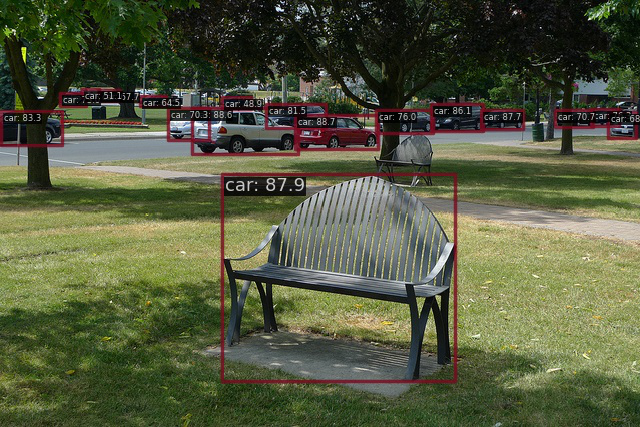

In [6]:

# Show the output image
from PIL import Image
Image.open('./output/vis/demo.jpg')

In [7]:
img = '../radar/datasets/test/test_open_0.png'
result = inferencer(img, out_dir='./output')

Output()

In [8]:
# min_x, min_y, max_x, max_y = result['predictions'][0]["bboxes"][0]
# min_x

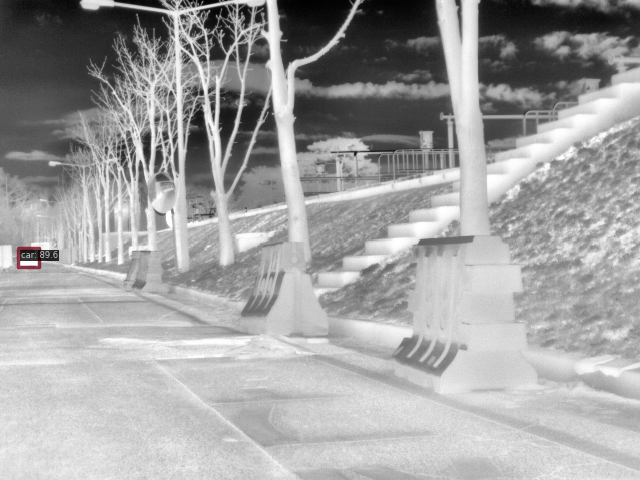

In [9]:
from PIL import Image
Image.open('./output/vis/test_open_0.png')

In [10]:
# !python tools/misc/download_dataset.py --dataset-name balloon --save-dir data --unzip


In [11]:
# # import json
# with open('../radar/datasets/anno/train.json', 'r') as file:
#     data = json.load(file)

# # # Now 'data' is a Python dictionary containing the JSON data
# # print(data)

In [12]:
# data.keys()

In [ ]:
# !python tools/train.py projects/CO-DETR/configs/codino/co_dino_5scale_swin_l_16xb1_16e_custom.py

08/27 14:47:22 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.7.10 (default, Feb 26 2021, 18:47:35) [GCC 7.3.0]
    CUDA available: True
    numpy_random_seed: 611959224
    GPU 0: NVIDIA RTX A6000
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.1, V11.1.105
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.9.0
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2021.2-Product Build 20210312 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=c

/mnt/nas2/users/eslim/workspace/comp/mmdetection/mmdet/models/dense_heads/anchor_head.py:108: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '
08/27 14:47:43 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
08/27 14:47:43 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NOR

08/27 14:47:50 - mmengine - INFO - paramwise_options -- backbone.stages.2.blocks.9.norm1.weight:lr=1e-05
08/27 14:47:50 - mmengine - INFO - paramwise_options -- backbone.stages.2.blocks.9.norm1.weight:weight_decay=0.0001
08/27 14:47:50 - mmengine - INFO - paramwise_options -- backbone.stages.2.blocks.9.norm1.weight:lr_mult=0.1
08/27 14:47:50 - mmengine - INFO - paramwise_options -- backbone.stages.2.blocks.9.norm1.bias:lr=1e-05
08/27 14:47:50 - mmengine - INFO - paramwise_options -- backbone.stages.2.blocks.9.norm1.bias:weight_decay=0.0001
08/27 14:47:50 - mmengine - INFO - paramwise_options -- backbone.stages.2.blocks.9.norm1.bias:lr_mult=0.1
08/27 14:47:50 - mmengine - INFO - paramwise_options -- backbone.stages.2.blocks.9.attn.w_msa.relative_position_bias_table:lr=1e-05
08/27 14:47:50 - mmengine - INFO - paramwise_options -- backbone.stages.2.blocks.9.attn.w_msa.relative_position_bias_table:weight_decay=0.0001
08/27 14:47:50 - mmengine - INFO - paramwise_options -- backbone.stages.2

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
08/27 14:47:57 - mmengine - INFO - Loads checkpoint by http backend from path: https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_large_patch4_window12_384_22k.pth
08/27 14:47:58 - mmengine - WARNING - init_weights of RPNHead has been called more than once.
Loads checkpoint by local backend from path: checkpoints/co_dino_5scale_swin_large_16e_o365tococo-614254c9.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: query_head.label_embedding.weight

missing keys in source state_dict: query_head.dn_generator.label_embedding.weight

08/27 14:47:58 - mmengine - INFO - Load checkpoint from checkpoints/co_dino_5scale_swin_large_16e_o365tococo-614254c9.pth
08/27 14:47:58 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in http

08/27 14:53:40 - mmengine - INFO - Epoch(train)  [1][ 200/7018]  lr: 1.0000e-05  eta: 2 days, 5:13:55  time: 1.6860  data_time: 0.0060  memory: 18540  grad_norm: 328.7571  loss: 29.3048  loss_cls: 0.2520  loss_bbox: 0.0550  loss_iou: 0.2701  d0.loss_cls: 0.3662  d0.loss_bbox: 0.0565  d0.loss_iou: 0.2794  d1.loss_cls: 0.2708  d1.loss_bbox: 0.0550  d1.loss_iou: 0.2727  d2.loss_cls: 0.2694  d2.loss_bbox: 0.0545  d2.loss_iou: 0.2700  d3.loss_cls: 0.2571  d3.loss_bbox: 0.0549  d3.loss_iou: 0.2697  d4.loss_cls: 0.2550  d4.loss_bbox: 0.0549  d4.loss_iou: 0.2699  enc_loss_cls: 0.3059  enc_loss_bbox: 0.0688  enc_loss_iou: 0.3090  dn_loss_cls: 0.0981  dn_loss_bbox: 0.0436  dn_loss_iou: 0.2074  d0.dn_loss_cls: 0.3654  d0.dn_loss_bbox: 0.0566  d0.dn_loss_iou: 0.2566  d1.dn_loss_cls: 0.1445  d1.dn_loss_bbox: 0.0459  d1.dn_loss_iou: 0.2153  d2.dn_loss_cls: 0.1129  d2.dn_loss_bbox: 0.0436  d2.dn_loss_iou: 0.2069  d3.dn_loss_cls: 0.0970  d3.dn_loss_bbox: 0.0436  d3.dn_loss_iou: 0.2069  d4.dn_loss_cls:

08/27 14:59:40 - mmengine - INFO - Epoch(train)  [1][ 400/7018]  lr: 1.0000e-05  eta: 2 days, 6:34:26  time: 1.7443  data_time: 0.0061  memory: 17465  grad_norm: 2819.5796  loss: 40.6338  loss_cls: 0.4949  loss_bbox: 0.0563  loss_iou: 0.2612  d0.loss_cls: 0.5056  d0.loss_bbox: 0.0554  d0.loss_iou: 0.2588  d1.loss_cls: 0.4315  d1.loss_bbox: 0.0572  d1.loss_iou: 0.2613  d2.loss_cls: 0.4602  d2.loss_bbox: 0.0572  d2.loss_iou: 0.2633  d3.loss_cls: 0.4756  d3.loss_bbox: 0.0562  d3.loss_iou: 0.2600  d4.loss_cls: 0.4705  d4.loss_bbox: 0.0565  d4.loss_iou: 0.2618  enc_loss_cls: 0.3401  enc_loss_bbox: 0.0729  enc_loss_iou: 0.2886  dn_loss_cls: 0.0649  dn_loss_bbox: 0.0494  dn_loss_iou: 0.1976  d0.dn_loss_cls: 0.1832  d0.dn_loss_bbox: 0.0581  d0.dn_loss_iou: 0.2403  d1.dn_loss_cls: 0.0759  d1.dn_loss_bbox: 0.0522  d1.dn_loss_iou: 0.2086  d2.dn_loss_cls: 0.0653  d2.dn_loss_bbox: 0.0514  d2.dn_loss_iou: 0.2022  d3.dn_loss_cls: 0.0543  d3.dn_loss_bbox: 0.0572  d3.dn_loss_iou: 0.2062  d4.dn_loss_cls

08/27 15:05:23 - mmengine - INFO - Epoch(train)  [1][ 600/7018]  lr: 1.0000e-05  eta: 2 days, 6:02:37  time: 1.7044  data_time: 0.0063  memory: 19648  grad_norm: 265.7050  loss: 27.0413  loss_cls: 0.1504  loss_bbox: 0.0587  loss_iou: 0.2844  d0.loss_cls: 0.2499  d0.loss_bbox: 0.0577  d0.loss_iou: 0.2811  d1.loss_cls: 0.1588  d1.loss_bbox: 0.0586  d1.loss_iou: 0.2867  d2.loss_cls: 0.1393  d2.loss_bbox: 0.0591  d2.loss_iou: 0.2898  d3.loss_cls: 0.1471  d3.loss_bbox: 0.0583  d3.loss_iou: 0.2843  d4.loss_cls: 0.1508  d4.loss_bbox: 0.0586  d4.loss_iou: 0.2840  enc_loss_cls: 0.1924  enc_loss_bbox: 0.0670  enc_loss_iou: 0.3111  dn_loss_cls: 0.0314  dn_loss_bbox: 0.0419  dn_loss_iou: 0.2006  d0.dn_loss_cls: 0.1188  d0.dn_loss_bbox: 0.0551  d0.dn_loss_iou: 0.2554  d1.dn_loss_cls: 0.0462  d1.dn_loss_bbox: 0.0430  d1.dn_loss_iou: 0.2037  d2.dn_loss_cls: 0.0333  d2.dn_loss_bbox: 0.0417  d2.dn_loss_iou: 0.1983  d3.dn_loss_cls: 0.0292  d3.dn_loss_bbox: 0.0417  d3.dn_loss_iou: 0.1989  d4.dn_loss_cls:

08/27 15:11:34 - mmengine - INFO - Epoch(train)  [1][ 800/7018]  lr: 1.0000e-05  eta: 2 days, 6:48:14  time: 1.7738  data_time: 0.0064  memory: 19615  grad_norm: 3419.8175  loss: 41.2754  loss_cls: 0.5369  loss_bbox: 0.0555  loss_iou: 0.2785  d0.loss_cls: 0.5165  d0.loss_bbox: 0.0539  d0.loss_iou: 0.2705  d1.loss_cls: 0.5098  d1.loss_bbox: 0.0559  d1.loss_iou: 0.2769  d2.loss_cls: 0.4989  d2.loss_bbox: 0.0558  d2.loss_iou: 0.2791  d3.loss_cls: 0.5518  d3.loss_bbox: 0.0553  d3.loss_iou: 0.2783  d4.loss_cls: 0.5169  d4.loss_bbox: 0.0556  d4.loss_iou: 0.2792  enc_loss_cls: 0.4146  enc_loss_bbox: 0.0630  enc_loss_iou: 0.2965  dn_loss_cls: 0.0194  dn_loss_bbox: 0.0380  dn_loss_iou: 0.1812  d0.dn_loss_cls: 0.0971  d0.dn_loss_bbox: 0.0503  d0.dn_loss_iou: 0.2390  d1.dn_loss_cls: 0.0378  d1.dn_loss_bbox: 0.0397  d1.dn_loss_iou: 0.1866  d2.dn_loss_cls: 0.0230  d2.dn_loss_bbox: 0.0378  d2.dn_loss_iou: 0.1801  d3.dn_loss_cls: 0.0196  d3.dn_loss_bbox: 0.0379  d3.dn_loss_iou: 0.1804  d4.dn_loss_cls

08/27 15:17:18 - mmengine - INFO - Exp name: co_dino_5scale_swin_l_16xb1_16e_custom_20240827_144721
08/27 15:17:18 - mmengine - INFO - Epoch(train)  [1][1000/7018]  lr: 1.0000e-05  eta: 2 days, 6:25:04  time: 1.6162  data_time: 0.0063  memory: 19654  grad_norm: 1566.5816  loss: 30.9227  loss_cls: 0.2752  loss_bbox: 0.0650  loss_iou: 0.2684  d0.loss_cls: 0.3528  d0.loss_bbox: 0.0629  d0.loss_iou: 0.2642  d1.loss_cls: 0.2789  d1.loss_bbox: 0.0667  d1.loss_iou: 0.2753  d2.loss_cls: 0.2682  d2.loss_bbox: 0.0669  d2.loss_iou: 0.2756  d3.loss_cls: 0.2670  d3.loss_bbox: 0.0643  d3.loss_iou: 0.2683  d4.loss_cls: 0.2660  d4.loss_bbox: 0.0650  d4.loss_iou: 0.2681  enc_loss_cls: 0.2636  enc_loss_bbox: 0.0726  enc_loss_iou: 0.2916  dn_loss_cls: 0.0129  dn_loss_bbox: 0.0465  dn_loss_iou: 0.1812  d0.dn_loss_cls: 0.0778  d0.dn_loss_bbox: 0.0587  d0.dn_loss_iou: 0.2333  d1.dn_loss_cls: 0.0224  d1.dn_loss_bbox: 0.0477  d1.dn_loss_iou: 0.1859  d2.dn_loss_cls: 0.0131  d2.dn_loss_bbox: 0.0465  d2.dn_loss_

08/27 15:23:05 - mmengine - INFO - Epoch(train)  [1][1200/7018]  lr: 1.0000e-05  eta: 2 days, 6:11:27  time: 1.7976  data_time: 0.0064  memory: 19646  grad_norm: 1522.9006  loss: 31.8234  loss_cls: 0.3689  loss_bbox: 0.0546  loss_iou: 0.2732  d0.loss_cls: 0.3600  d0.loss_bbox: 0.0519  d0.loss_iou: 0.2712  d1.loss_cls: 0.3450  d1.loss_bbox: 0.0558  d1.loss_iou: 0.2756  d2.loss_cls: 0.3519  d2.loss_bbox: 0.0554  d2.loss_iou: 0.2743  d3.loss_cls: 0.3836  d3.loss_bbox: 0.0555  d3.loss_iou: 0.2754  d4.loss_cls: 0.3775  d4.loss_bbox: 0.0552  d4.loss_iou: 0.2739  enc_loss_cls: 0.2897  enc_loss_bbox: 0.0649  enc_loss_iou: 0.3078  dn_loss_cls: 0.0160  dn_loss_bbox: 0.0375  dn_loss_iou: 0.1786  d0.dn_loss_cls: 0.0786  d0.dn_loss_bbox: 0.0496  d0.dn_loss_iou: 0.2375  d1.dn_loss_cls: 0.0220  d1.dn_loss_bbox: 0.0394  d1.dn_loss_iou: 0.1840  d2.dn_loss_cls: 0.0153  d2.dn_loss_bbox: 0.0375  d2.dn_loss_iou: 0.1774  d3.dn_loss_cls: 0.0142  d3.dn_loss_bbox: 0.0374  d3.dn_loss_iou: 0.1775  d4.dn_loss_cls

08/27 15:29:01 - mmengine - INFO - Epoch(train)  [1][1400/7018]  lr: 1.0000e-05  eta: 2 days, 6:11:19  time: 1.6326  data_time: 0.0068  memory: 19618  grad_norm: 278.6974  loss: 24.4169  loss_cls: 0.0969  loss_bbox: 0.0528  loss_iou: 0.2618  d0.loss_cls: 0.1959  d0.loss_bbox: 0.0544  d0.loss_iou: 0.2664  d1.loss_cls: 0.1152  d1.loss_bbox: 0.0535  d1.loss_iou: 0.2652  d2.loss_cls: 0.1057  d2.loss_bbox: 0.0531  d2.loss_iou: 0.2621  d3.loss_cls: 0.0959  d3.loss_bbox: 0.0528  d3.loss_iou: 0.2616  d4.loss_cls: 0.0946  d4.loss_bbox: 0.0528  d4.loss_iou: 0.2617  enc_loss_cls: 0.1441  enc_loss_bbox: 0.0664  enc_loss_iou: 0.3034  dn_loss_cls: 0.0120  dn_loss_bbox: 0.0377  dn_loss_iou: 0.1817  d0.dn_loss_cls: 0.0882  d0.dn_loss_bbox: 0.0513  d0.dn_loss_iou: 0.2395  d1.dn_loss_cls: 0.0232  d1.dn_loss_bbox: 0.0398  d1.dn_loss_iou: 0.1877  d2.dn_loss_cls: 0.0137  d2.dn_loss_bbox: 0.0375  d2.dn_loss_iou: 0.1807  d3.dn_loss_cls: 0.0116  d3.dn_loss_bbox: 0.0376  d3.dn_loss_iou: 0.1810  d4.dn_loss_cls:

08/27 15:34:54 - mmengine - INFO - Epoch(train)  [1][1600/7018]  lr: 1.0000e-05  eta: 2 days, 6:07:15  time: 1.8298  data_time: 0.0064  memory: 19592  grad_norm: 2386.7781  loss: 36.0463  loss_cls: 0.4929  loss_bbox: 0.0529  loss_iou: 0.2563  d0.loss_cls: 0.4887  d0.loss_bbox: 0.0527  d0.loss_iou: 0.2599  d1.loss_cls: 0.4611  d1.loss_bbox: 0.0530  d1.loss_iou: 0.2554  d2.loss_cls: 0.4991  d2.loss_bbox: 0.0523  d2.loss_iou: 0.2547  d3.loss_cls: 0.4990  d3.loss_bbox: 0.0528  d3.loss_iou: 0.2556  d4.loss_cls: 0.4954  d4.loss_bbox: 0.0528  d4.loss_iou: 0.2560  enc_loss_cls: 0.4607  enc_loss_bbox: 0.0659  enc_loss_iou: 0.2881  dn_loss_cls: 0.0171  dn_loss_bbox: 0.0372  dn_loss_iou: 0.1773  d0.dn_loss_cls: 0.0759  d0.dn_loss_bbox: 0.0502  d0.dn_loss_iou: 0.2336  d1.dn_loss_cls: 0.0208  d1.dn_loss_bbox: 0.0392  d1.dn_loss_iou: 0.1823  d2.dn_loss_cls: 0.0148  d2.dn_loss_bbox: 0.0371  d2.dn_loss_iou: 0.1762  d3.dn_loss_cls: 0.0159  d3.dn_loss_bbox: 0.0371  d3.dn_loss_iou: 0.1764  d4.dn_loss_cls

08/27 15:44:50 - mmengine - INFO - Epoch(train)  [1][1950/7018]  lr: 1.0000e-05  eta: 2 days, 5:37:24  time: 1.6062  data_time: 0.0063  memory: 19098  grad_norm: 1913.2885  loss: 34.4580  loss_cls: 0.3907  loss_bbox: 0.0488  loss_iou: 0.2635  d0.loss_cls: 0.4456  d0.loss_bbox: 0.0469  d0.loss_iou: 0.2543  d1.loss_cls: 0.3363  d1.loss_bbox: 0.0490  d1.loss_iou: 0.2603  d2.loss_cls: 0.3411  d2.loss_bbox: 0.0485  d2.loss_iou: 0.2619  d3.loss_cls: 0.3694  d3.loss_bbox: 0.0488  d3.loss_iou: 0.2627  d4.loss_cls: 0.3763  d4.loss_bbox: 0.0488  d4.loss_iou: 0.2632  enc_loss_cls: 0.3410  enc_loss_bbox: 0.0572  enc_loss_iou: 0.2917  dn_loss_cls: 0.0333  dn_loss_bbox: 0.0358  dn_loss_iou: 0.1716  d0.dn_loss_cls: 0.1254  d0.dn_loss_bbox: 0.0461  d0.dn_loss_iou: 0.2254  d1.dn_loss_cls: 0.0589  d1.dn_loss_bbox: 0.0369  d1.dn_loss_iou: 0.1764  d2.dn_loss_cls: 0.0341  d2.dn_loss_bbox: 0.0356  d2.dn_loss_iou: 0.1712  d3.dn_loss_cls: 0.0318  d3.dn_loss_bbox: 0.0357  d3.dn_loss_iou: 0.1712  d4.dn_loss_cls

08/27 15:50:32 - mmengine - INFO - Epoch(train)  [1][2150/7018]  lr: 1.0000e-05  eta: 2 days, 5:25:23  time: 1.5313  data_time: 0.0064  memory: 17883  grad_norm: 1913.1443  loss: 33.8484  loss_cls: 0.3666  loss_bbox: 0.0500  loss_iou: 0.2630  d0.loss_cls: 0.3872  d0.loss_bbox: 0.0515  d0.loss_iou: 0.2674  d1.loss_cls: 0.3477  d1.loss_bbox: 0.0499  d1.loss_iou: 0.2618  d2.loss_cls: 0.3601  d2.loss_bbox: 0.0504  d2.loss_iou: 0.2646  d3.loss_cls: 0.3486  d3.loss_bbox: 0.0500  d3.loss_iou: 0.2634  d4.loss_cls: 0.3677  d4.loss_bbox: 0.0500  d4.loss_iou: 0.2631  enc_loss_cls: 0.3020  enc_loss_bbox: 0.0583  enc_loss_iou: 0.2931  dn_loss_cls: 0.0090  dn_loss_bbox: 0.0344  dn_loss_iou: 0.1792  d0.dn_loss_cls: 0.0629  d0.dn_loss_bbox: 0.0466  d0.dn_loss_iou: 0.2344  d1.dn_loss_cls: 0.0133  d1.dn_loss_bbox: 0.0357  d1.dn_loss_iou: 0.1830  d2.dn_loss_cls: 0.0100  d2.dn_loss_bbox: 0.0344  d2.dn_loss_iou: 0.1780  d3.dn_loss_cls: 0.0090  d3.dn_loss_bbox: 0.0343  d3.dn_loss_iou: 0.1784  d4.dn_loss_cls

08/27 15:56:16 - mmengine - INFO - Epoch(train)  [1][2350/7018]  lr: 1.0000e-05  eta: 2 days, 5:14:58  time: 1.7420  data_time: 0.0063  memory: 19619  grad_norm: 295.2511  loss: 25.9447  loss_cls: 0.1527  loss_bbox: 0.0581  loss_iou: 0.2798  d0.loss_cls: 0.2452  d0.loss_bbox: 0.0529  d0.loss_iou: 0.2752  d1.loss_cls: 0.1797  d1.loss_bbox: 0.0557  d1.loss_iou: 0.2758  d2.loss_cls: 0.1589  d2.loss_bbox: 0.0549  d2.loss_iou: 0.2786  d3.loss_cls: 0.1498  d3.loss_bbox: 0.0592  d3.loss_iou: 0.2804  d4.loss_cls: 0.1545  d4.loss_bbox: 0.0580  d4.loss_iou: 0.2799  enc_loss_cls: 0.1738  enc_loss_bbox: 0.0658  enc_loss_iou: 0.3082  dn_loss_cls: 0.0189  dn_loss_bbox: 0.0372  dn_loss_iou: 0.1838  d0.dn_loss_cls: 0.0854  d0.dn_loss_bbox: 0.0509  d0.dn_loss_iou: 0.2426  d1.dn_loss_cls: 0.0250  d1.dn_loss_bbox: 0.0387  d1.dn_loss_iou: 0.1880  d2.dn_loss_cls: 0.0186  d2.dn_loss_bbox: 0.0372  d2.dn_loss_iou: 0.1828  d3.dn_loss_cls: 0.0186  d3.dn_loss_bbox: 0.0371  d3.dn_loss_iou: 0.1827  d4.dn_loss_cls:

08/27 16:02:09 - mmengine - INFO - Epoch(train)  [1][2550/7018]  lr: 1.0000e-05  eta: 2 days, 5:12:06  time: 1.8497  data_time: 0.0068  memory: 19387  grad_norm: 302.9439  loss: 25.8142  loss_cls: 0.1176  loss_bbox: 0.0679  loss_iou: 0.2922  d0.loss_cls: 0.2230  d0.loss_bbox: 0.0662  d0.loss_iou: 0.2941  d1.loss_cls: 0.1239  d1.loss_bbox: 0.0677  d1.loss_iou: 0.2956  d2.loss_cls: 0.1236  d2.loss_bbox: 0.0659  d2.loss_iou: 0.2897  d3.loss_cls: 0.1189  d3.loss_bbox: 0.0678  d3.loss_iou: 0.2919  d4.loss_cls: 0.1191  d4.loss_bbox: 0.0676  d4.loss_iou: 0.2915  enc_loss_cls: 0.1511  enc_loss_bbox: 0.0782  enc_loss_iou: 0.3318  dn_loss_cls: 0.0090  dn_loss_bbox: 0.0441  dn_loss_iou: 0.1875  d0.dn_loss_cls: 0.0746  d0.dn_loss_bbox: 0.0603  d0.dn_loss_iou: 0.2525  d1.dn_loss_cls: 0.0162  d1.dn_loss_bbox: 0.0453  d1.dn_loss_iou: 0.1923  d2.dn_loss_cls: 0.0108  d2.dn_loss_bbox: 0.0440  d2.dn_loss_iou: 0.1867  d3.dn_loss_cls: 0.0095  d3.dn_loss_bbox: 0.0440  d3.dn_loss_iou: 0.1868  d4.dn_loss_cls:

08/27 16:08:22 - mmengine - INFO - Epoch(train)  [1][2750/7018]  lr: 1.0000e-05  eta: 2 days, 5:22:43  time: 1.8578  data_time: 0.0069  memory: 19104  grad_norm: 273.3703  loss: 24.1222  loss_cls: 0.1125  loss_bbox: 0.0486  loss_iou: 0.2706  d0.loss_cls: 0.1832  d0.loss_bbox: 0.0516  d0.loss_iou: 0.2821  d1.loss_cls: 0.1087  d1.loss_bbox: 0.0500  d1.loss_iou: 0.2784  d2.loss_cls: 0.1049  d2.loss_bbox: 0.0491  d2.loss_iou: 0.2751  d3.loss_cls: 0.1014  d3.loss_bbox: 0.0490  d3.loss_iou: 0.2719  d4.loss_cls: 0.1089  d4.loss_bbox: 0.0487  d4.loss_iou: 0.2709  enc_loss_cls: 0.1363  enc_loss_bbox: 0.0578  enc_loss_iou: 0.2986  dn_loss_cls: 0.0074  dn_loss_bbox: 0.0349  dn_loss_iou: 0.1795  d0.dn_loss_cls: 0.0638  d0.dn_loss_bbox: 0.0474  d0.dn_loss_iou: 0.2397  d1.dn_loss_cls: 0.0140  d1.dn_loss_bbox: 0.0361  d1.dn_loss_iou: 0.1852  d2.dn_loss_cls: 0.0087  d2.dn_loss_bbox: 0.0348  d2.dn_loss_iou: 0.1790  d3.dn_loss_cls: 0.0076  d3.dn_loss_bbox: 0.0348  d3.dn_loss_iou: 0.1792  d4.dn_loss_cls:

08/27 16:14:09 - mmengine - INFO - Epoch(train)  [1][2950/7018]  lr: 1.0000e-05  eta: 2 days, 5:14:05  time: 1.6421  data_time: 0.0066  memory: 18502  grad_norm: 370.6938  loss: 27.3142  loss_cls: 0.2115  loss_bbox: 0.0582  loss_iou: 0.2788  d0.loss_cls: 0.2947  d0.loss_bbox: 0.0607  d0.loss_iou: 0.2875  d1.loss_cls: 0.2118  d1.loss_bbox: 0.0592  d1.loss_iou: 0.2833  d2.loss_cls: 0.1721  d2.loss_bbox: 0.0587  d2.loss_iou: 0.2896  d3.loss_cls: 0.2191  d3.loss_bbox: 0.0570  d3.loss_iou: 0.2763  d4.loss_cls: 0.2019  d4.loss_bbox: 0.0570  d4.loss_iou: 0.2800  enc_loss_cls: 0.1995  enc_loss_bbox: 0.0748  enc_loss_iou: 0.3366  dn_loss_cls: 0.0260  dn_loss_bbox: 0.0437  dn_loss_iou: 0.1957  d0.dn_loss_cls: 0.0821  d0.dn_loss_bbox: 0.0598  d0.dn_loss_iou: 0.2644  d1.dn_loss_cls: 0.0280  d1.dn_loss_bbox: 0.0446  d1.dn_loss_iou: 0.1992  d2.dn_loss_cls: 0.0220  d2.dn_loss_bbox: 0.0436  d2.dn_loss_iou: 0.1930  d3.dn_loss_cls: 0.0239  d3.dn_loss_bbox: 0.0436  d3.dn_loss_iou: 0.1947  d4.dn_loss_cls:

08/27 16:20:06 - mmengine - INFO - Epoch(train)  [1][3150/7018]  lr: 1.0000e-05  eta: 2 days, 5:11:49  time: 1.6301  data_time: 0.0065  memory: 19128  grad_norm: 269.5697  loss: 24.2948  loss_cls: 0.1069  loss_bbox: 0.0530  loss_iou: 0.2702  d0.loss_cls: 0.1948  d0.loss_bbox: 0.0532  d0.loss_iou: 0.2768  d1.loss_cls: 0.1273  d1.loss_bbox: 0.0521  d1.loss_iou: 0.2711  d2.loss_cls: 0.1138  d2.loss_bbox: 0.0510  d2.loss_iou: 0.2701  d3.loss_cls: 0.1047  d3.loss_bbox: 0.0534  d3.loss_iou: 0.2719  d4.loss_cls: 0.1066  d4.loss_bbox: 0.0529  d4.loss_iou: 0.2702  enc_loss_cls: 0.1370  enc_loss_bbox: 0.0655  enc_loss_iou: 0.3046  dn_loss_cls: 0.0144  dn_loss_bbox: 0.0355  dn_loss_iou: 0.1747  d0.dn_loss_cls: 0.0736  d0.dn_loss_bbox: 0.0483  d0.dn_loss_iou: 0.2350  d1.dn_loss_cls: 0.0191  d1.dn_loss_bbox: 0.0368  d1.dn_loss_iou: 0.1806  d2.dn_loss_cls: 0.0135  d2.dn_loss_bbox: 0.0354  d2.dn_loss_iou: 0.1747  d3.dn_loss_cls: 0.0129  d3.dn_loss_bbox: 0.0354  d3.dn_loss_iou: 0.1745  d4.dn_loss_cls:

08/27 16:26:00 - mmengine - INFO - Epoch(train)  [1][3350/7018]  lr: 1.0000e-05  eta: 2 days, 5:08:00  time: 1.9690  data_time: 0.0070  memory: 18562  grad_norm: 301.8336  loss: 24.2942  loss_cls: 0.0783  loss_bbox: 0.0557  loss_iou: 0.2956  d0.loss_cls: 0.1920  d0.loss_bbox: 0.0544  d0.loss_iou: 0.2973  d1.loss_cls: 0.0867  d1.loss_bbox: 0.0571  d1.loss_iou: 0.3028  d2.loss_cls: 0.0866  d2.loss_bbox: 0.0557  d2.loss_iou: 0.2978  d3.loss_cls: 0.0820  d3.loss_bbox: 0.0553  d3.loss_iou: 0.2960  d4.loss_cls: 0.0772  d4.loss_bbox: 0.0556  d4.loss_iou: 0.2968  enc_loss_cls: 0.1248  enc_loss_bbox: 0.0657  enc_loss_iou: 0.3310  dn_loss_cls: 0.0073  dn_loss_bbox: 0.0365  dn_loss_iou: 0.1888  d0.dn_loss_cls: 0.0553  d0.dn_loss_bbox: 0.0535  d0.dn_loss_iou: 0.2578  d1.dn_loss_cls: 0.0141  d1.dn_loss_bbox: 0.0378  d1.dn_loss_iou: 0.1914  d2.dn_loss_cls: 0.0088  d2.dn_loss_bbox: 0.0366  d2.dn_loss_iou: 0.1867  d3.dn_loss_cls: 0.0079  d3.dn_loss_bbox: 0.0364  d3.dn_loss_iou: 0.1865  d4.dn_loss_cls:

In [13]:
##test

# {
#       'predictions' : [
#         # Each instance corresponds to an input image
#         {
#           'labels': [...],  # int list of length (N, )
#           'scores': [...],  # float list of length (N, )
#           'bboxes': [...],  # 2d list of shape (N, 4), format: [min_x, min_y, max_x, max_y]
#         },
#         ...
#       ],
#       'visualization' : [
#         array(..., dtype=uint8),
#       ]
#   }

# [

# {

# "image_id" : 이미지 구분자,

# "category_id" : 객체 클래스 구분자,

# "bbox" : [

# 좌상단 x 좌표(pixel),

# 좌상단 y 좌표(pixel),

# bbox의 width(pixel),

# bbox의 height(pixel)

# ],

# "score" : Confidence Score,

# "segmentation" : []

# },

# {

# ...

# },

# ...

# ]

In [14]:
# a,b,c,d = result['predictions'][0]["bboxes"][0]
# a
# result['predictions'][0]["bboxes"][0]

In [15]:
# # !pip install natsort
# import matplotlib.pyplot as plt
# from PIL import Image, ImageDraw

# min_x,min_y,width,height=[17.932376861572266, 248.2184600830078, 21.222991943359375, 19.119918823242188]
# # image_path = 'path_to_your_image.jpg'  
# image_path = '../radar/datasets/test/test_open_0.png'

# # Replace with the path to your image
# image = Image.open(image_path)

# # Bounding box coordinates
# # min_x = 50
# # min_y = 30
# # width = 100
# # height = 60

# # Create a draw object
# draw = ImageDraw.Draw(image)

# # Draw the bounding box
# draw.rectangle([min_x, min_y, min_x + width, min_y + height], outline='red', width=3)

# # Display the image with the bounding box
# plt.imshow(image)
# plt.axis('off')  # Hide the axis
# plt.show()

In [16]:
from natsort import natsorted

test_dir_prefix = "../radar/datasets/test/"
images = os.listdir(test_dir_prefix)
sorted_images = natsorted(images)
# sorted_images
sorted_images[0].split(".")[0]

'test_open_0'

In [17]:
import json
sub_results = []

# n=0
for image_dir in sorted_images:
    result = inferencer(os.path.join(test_dir_prefix,image_dir))
    obj_num = len(result['predictions'][0]["labels"])
    for idx in range(obj_num):
        if result['predictions'][0]["scores"][idx] < 0.1:
            continue
        if result['predictions'][0]["labels"][idx] > 8:
            print(result['predictions'][0]["labels"][idx])
        min_x, min_y, max_x, max_y = result['predictions'][0]["bboxes"][idx]
        ret = {
            "image_id" : str(image_dir.split(".")[0]),
            "category_id" : result['predictions'][0]["labels"][idx],
            "bbox":[
                min_x,
                min_y,
                max_x-min_x,
                max_y-min_y
            ],
            "score":result['predictions'][0]["scores"][idx],
        }
        sub_results.append(ret)
#     break
#     n=n+1
#     if n>100:
#         break
#     break

with open("/home/eslim/workspace/comp/results/sub_results.txt", "w") as file:
    json.dump(sub_results, file, indent=4)

# result = inferencer(img)

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [55]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="unauthorized")
# project = rf.workspace("nii").project("pedestrian-cvc-14")
# version = project.version(1)
# dataset = version.download("coco-mmdetection")
                

